In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('example2.csv')
df.shape

(995, 3)

In [3]:
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [4]:
df.isna().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [5]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [6]:
X = df.drop(['diabetes'],axis=1)
y = df['diabetes']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)

In [7]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [8]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)
print("Classification Report\n\n",classification_report(y_test,y_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.92      0.91      0.91       171
           1       0.90      0.91      0.91       161

    accuracy                           0.91       332
   macro avg       0.91      0.91      0.91       332
weighted avg       0.91      0.91      0.91       332



In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[155  16]
 [ 14 147]]


In [11]:
print('Accuracy score:',accuracy_score(y_test,y_pred))
y_predproba=model.predict_proba(X_test)
y_predprobatrain=model.predict_proba(X_train)

Accuracy score: 0.9096385542168675


0.9096385542168675 accuracy
0.901840490797546 precision

0.9130434782608695 recall

0.9074074074074074 f1 score

0.9726308524935527 AUC


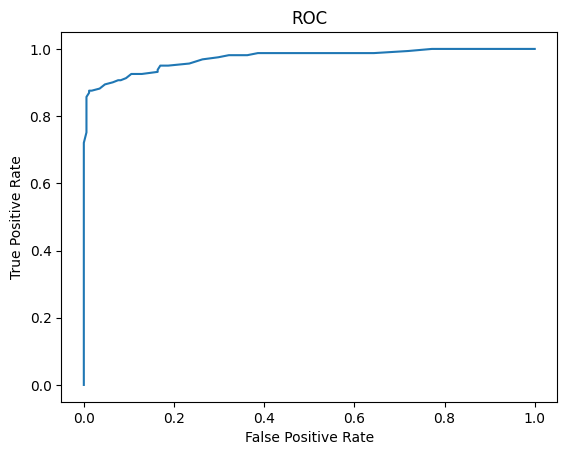

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predproba[:,1])

df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
df.to_csv("roc21.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(y_test,y_pred),"accuracy")
print(precision_score(y_test,y_pred),"precision")
print()
print(recall_score(y_test,y_pred),"recall")
print()
print(f1_score(y_test,y_pred),"f1 score")
print()
from sklearn.metrics import roc_curve, auc
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc,"AUC")

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)

In [14]:
fpr3, tpr3, thresholds3 = roc_curve(y_test,y_pred3)
auc_score7=roc_auc_score(y_test, y_pred3)
print(fpr3)
print(tpr3)
print(thresholds3)
print(auc_score7)
y_pred3 = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[0.         0.09356725 1.        ]
[0.         0.91304348 1.        ]
[inf  1.  0.]
0.9097381133994407
[[155  16]
 [ 14 147]]


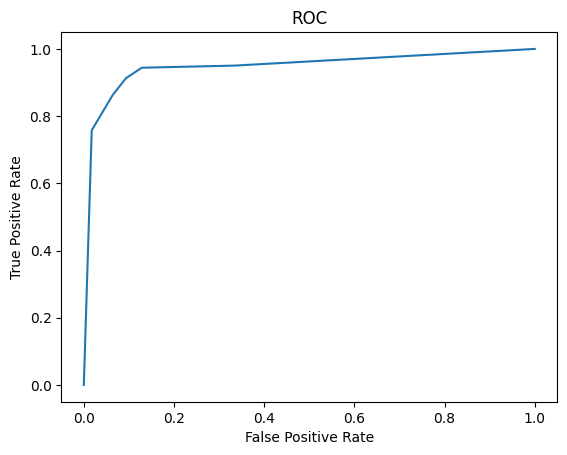

In [15]:
y_predproba12=knn.predict_proba(X_test)
false_positive_rate12, true_positive_rate12, thresholds12 = roc_curve(y_test, y_predproba12[:,1])
df6 = pd.DataFrame({'Threshold': thresholds12, 
              'TPR': true_positive_rate12, 
              'FPR':false_positive_rate12
             })
df6.to_csv("roc23.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate12, true_positive_rate12)

In [16]:
import sklearn.neural_network 
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(4, ), activation='relu',alpha=1.e-5,solver='adam')
neural_network.fit(X_train, y_train) 
y_pred10 = neural_network.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(y_test, y_pred10)
from sklearn.metrics import roc_curve, auc
fpr10, tpr10, thresholds10 = roc_curve(y_test,y_pred10)
auc_score10=roc_auc_score(y_test, y_pred10)
print(fpr10)
print(tpr10)
print(thresholds10)
print(auc_score10)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(y_test, y_pred10)
print(cm10)

[0.         0.07602339 1.        ]
[0.        0.9068323 1.       ]
[inf  1.  0.]
0.9154044531618903
[[158  13]
 [ 15 146]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


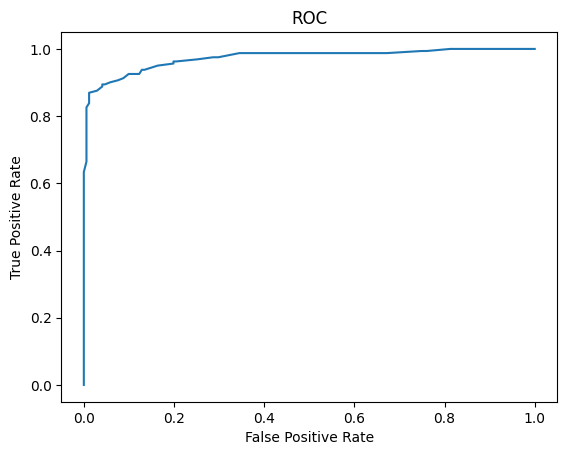

In [17]:
y_predproba11=neural_network.predict_proba(X_test)
false_positive_rate11, true_positive_rate11, thresholds11 = roc_curve(y_test, y_predproba11[:,1])
df3 = pd.DataFrame({'Threshold': thresholds11, 
              'TPR': true_positive_rate11, 
              'FPR':false_positive_rate11
             })
df3.to_csv("roc22.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate11, true_positive_rate11)